In [ ]:
from keras import Model
from keras.layers import Input, Dense
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
X = pd.DataFrame( (np.random.randn(1000,2)), columns=["A", "B"] )
X["B"] = (X["A"]) *6

In [ ]:
plt.plot(X.A, X.B, "o")

In [ ]:
def relu(x):
    return(x * (x > 0))

Yes. Keras initializes some negative and some positive weights, randomly by default -- you can also specify how the weights are initialized [link] (https://keras.io/initializers/). I think that you're right that some nodes could be dead at the start, if the incoming weights sum up to a value less than 0

In [ ]:
################# CUSTOM LOSS FUNCTION ########################

In [ ]:
from keras import Model
from keras.layers import Input, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from keras.backend import clear_session
clear_session()

from keras import losses

def my_loss(y_true, y_pred):
    final_loss = (losses.binary_crossentropy(y_true[:, 0], y_pred[:, 0]) + 
                    y_true[:, 0] * 
                  losses.categorical_crossentropy(y_true[:, 1:], y_pred[:,1:]))
    return final_loss

In [ ]:
from keras.layers import Concatenate
XX = pd.DataFrame( (np.random.randn(1000,2)), columns=["A", "B"] )
XX["B"] = (XX["A"]) *6 + XX["B"]
yy = np.random.randn(1000, 2)

n = 2

input_layer = Input(shape=(n, ))
shared = Dense(32)(input_layer)
sub1 = Dense(16)(shared)
sub2 = Dense(16)(shared)
y1 = Dense(1, activation='sigmoid')(sub1)
y2 = Dense(4, activation='softmax')(sub2)
mergedOutput = Concatenate()([y1, y2])


In [ ]:
model = Model(input_layer, mergedOutput)
model.summary()

model.compile(optimizer='adam', loss=my_loss)
yy.shape

In [ ]:
Trainmod = model.fit(x=XX, y=yy, epochs=10, batch_size=2**6)
# plt.plot(XX.A, X.B, "o", label = "actual")
# plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o", label = "preds")

#plt.legend()

In [ ]:
model.predict(np.array([[13, .12]]))

In [ ]:
np.array(XX)

In [ ]:



def disemvowel(string):
    message = []
    vowels = ['a', 'e', 'i', 'o', 'u']
    for letter in string:
         if letter not in vowels:
                message.append(letter)
    return (message)

disemvowel("Leol")

In [ ]:
aeInput = Input((2,))
encode = Dense(2, activation='relu')(aeInput)
aeOutput = Dense(2, activation='relu')(encode)

In [ ]:
import keras.backend as K

# examples of custom loss functions
def my_loss(y_true, y_pred):
    # this example is mean squared error
    # works if if y_pred and y_true are greater than 1D
    return K.mean(K.square(y_pred - y_true))

def my_loss(y_true, y_pred):
    # calculate mean(abs(y_pred1*y_pred2 - y_true1*ytrue2)) 
    return K.mean(K.abs(K.prod(y_pred, axis = 1) - K.prod(y_true, axis = 1)))

AE = Model(aeInput, aeOutput, name="autoencoder")
AE.compile(optimizer='adam', loss=my_loss, )

In [ ]:
import tensorflow as tf

y_true = np.random.rand(100, 2) + 1
y_pred = np.random.rand(100, 2) + 1

my_loss(y_true, y_pred) # tensor
print(tf.Session().run(K.mean(my_loss(y_true, y_pred))))

In [ ]:
wts = [np.array([[4,  5 ],
        [2, 6]], dtype="float32"),
 np.array([ 0, 0], dtype="float32"),
 np.array([[1, 1],
        [1, 1 ]], dtype="float32"),
 np.array([0, 0  ], dtype="float32")]

AE.set_weights(wts)

In [ ]:

AE.get_weights()

In [ ]:
TrainAE = AE.fit( x=X, y=X, epochs=10, batch_size=2**6)
plt.plot(X.A, X.B, "o", label = "actual")
plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o", label = "preds")

plt.legend()

In [ ]:
AE.evaluate(X, X)

In [ ]:
import tensorflow as tf

y_true = X.astype("float32")
y_pred = AE.predict(X).astype("float32")

print(tf.Session().run((my_loss(y_true, y_pred))))

In [ ]:
y_true = X
y_pred = AE.predict(X)

my_loss(y_true, y_pred) # tensor
print(tf.Session().run(K.mean(my_loss(y_true, y_pred))))

In [ ]:
AE.predict(X).shape

In [ ]:
wts = AE.get_weights()
wts = [np.array([[-0,  -0 ],
        [ -0, -0]], dtype="float32"),
 np.array([ 0, 0], dtype="float32"),
 np.array([[ 0,  0 ],
        [ 0 , 0 ]], dtype="float32"),
 np.array([0, 0  ], dtype="float32")]

AE.set_weights(wts)

In [ ]:
wtsConcatenated = [np.vstack([wts[ii + 1], wts[ii]]) for ii in np.arange(0, len(wts), 2)]

In [ ]:
AE.predict(np.array([[-0.9, -0.33]]))

In [ ]:
AE.predict(X).shape

In [ ]:
LayerValues = []
    
inputData= np.array([[1, -0.9, -0.33]])
LayerValues.append(inputData)

jj = 0

wtsConcatenated = [np.vstack([wts[ii + 1], wts[ii]]) for ii in np.arange(0, len(wts), 2)]

nextLayer = np.dot(LayerValues[jj], wtsConcatenated[jj]).astype("float32")
nextLayer = np.hstack([np.array([1], dtype = "float32").reshape(-1,1), nextLayer] )
nextLayer = relu(nextLayer) # apply relu
print(nextLayer)
jj = 1
nextLayer = np.dot(np.array([nextLayer]), wtsConcatenated[jj]).astype("float32")
relu(nextLayer)

In [ ]:
plt.plot(X.A, X.B, "o", label = "actual")
plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o", label = "preds")

plt.legend()

In [ ]:
f, ax = plt.subplots(figsize=(8, 8))
sns.kdeplot( X.A, X.B, shade=False, axis=ax)
sns.kdeplot(AE.predict(X)[:,0], AE.predict(X)[:,1], shade=False, axis=ax)

In [ ]:
plt.plot(AE.predict(X)[:,0], AE.predict(X)[:,1], "o")

In [ ]:
from PIL import Image
import numpy as np
from pylab import imshow, show, get_cmap
from numpy import random

Z = random.random((50,50))   # Test data

imshow(Z, cmap=get_cmap("Spectral"), interpolation='nearest')
plt.savefig('your_file.tif')

In [ ]:
import cv2

BLACK_MIN = np.array([0, 20, 20], np.uint8)
BLACK_MAX = np.array([120, 255, 255], np.uint8)
imgg = cv2.imread('your_file.tif', 1)
dst = cv2.inRange(imgg, BLACK_MIN, BLACK_MAX)

no_black = cv2.countNonZero(dst)

print('The number of black pixels is: ' + str(no_black))

In [ ]:
imgg

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(imgg)

In [ ]:
#### More custom losses

In [ ]:
from keras import Model
from keras.layers import Input, Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
%matplotlib inline

In [ ]:
class Losses:
    def IoULoss(targets, inputs, smooth=1e-6):
        #targets = K.flatten(targets)
#         inputs = K.reshape(inputs, [1, -1]) # 1 row, as many columns as needed
#         targets = K.reshape(targets, [-1, 1]) # 1 column, as many rows as needed
        inputs = K.reshape(inputs, [1, -1]) # 1 row, as many columns as needed
        targets = K.reshape(targets, [-1, 1]) # 1 column, as many rows as needed
        print(inputs.shape, targets.shape)
        print(K.sum(K.dot(targets, inputs)).shape)
        
        intersection = K.sum(K.dot(targets, inputs))
        total = K.sum(targets) + K.sum(inputs)
        union = total - intersection

        IoU = (intersection + smooth) / (union + smooth)
        return 1 - IoU

aeInput = Input((2,))
encode = Dense(2, activation='relu')(aeInput)
aeOutput = Dense(2, activation='relu')(encode)
model = Model(aeInput, aeOutput)

model.compile(loss=Losses.IoULoss, optimizer="adam",
                      metrics=["accuracy"])

In [ ]:
XX = pd.DataFrame( (np.random.randn(1000,2)), columns=["A", "B"] )
XX["B"] = (XX["A"]) *6 + XX["B"]
yy = np.random.randn(1000, 2)

model.fit(XX, yy)

In [ ]:
import tensorflow as tf
import numpy as np

xx = np.random.randn(100)
xx = np.asarray(xx, np.float32)

xx_tf = tf.convert_to_tensor(xx, np.float32)
xx_tf = K.reshape(xx_tf, [-1, 1])
print(xx_tf.shape)

yy = np.random.randn(100)
yy = np.asarray(yy, np.float32)

yy_tf = tf.convert_to_tensor(xx, np.float32)
yy_tf = K.reshape(yy_tf, [1, -1])
K.dot(xx_tf, yy_tf)

In [ ]:
xx_tf = K.reshape(xx_tf, [1, -1])
yy_tf = K.reshape(yy_tf, [-1, 1])


print(tf.Session().run(Losses.IoULoss(xx_tf, yy_tf)))

In [ ]:
np.dot(np.random.rand(100), np.random.rand(100))

In [ ]:
x = K.random_uniform_variable(shape=(100, 1), low=0, high=1)
y = K.random_uniform_variable(shape=(1, 100), low=0, high=1)
xy = K.dot(x, y)

In [ ]:
x2 = K.flatten(y)
x2.shape

In [ ]:
x.shape

In [ ]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


X, y = make_blobs(n_samples = 100, n_features = 2, centers = 2, random_state = 123)

# fit supervised KNN classifier
knn = KNeighborsClassifier()
knn.fit(X, y) 

# create 50 new data points
# with the same number of features as the training set
new_data = np.random.randn(50, 2)

# predict new labels
new_labels = knn.predict(new_data)

# plot training clusters
plt.plot(X[y== 1, 0], 
         X[y==1,1], 
         "C1o", label = "training cluster 1")
plt.plot(X[y== 0, 0], 
         X[y==0,1], 
         "C0o", label = "training custer 2")

# plot predictions on new data
plt.plot(new_data[new_labels== 1, 0], 
         new_data[new_labels==1,1], 
         "ro", label = "new data assigned to cluster 1")
plt.plot(new_data[new_labels== 0, 0], 
         new_data[new_labels==0,1], 
         "bo", label = "new data assigned to cluster 2")
plt.legend()

In [ ]:
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier

knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train) 



knn.predict(iris_X_test)

iris_y_test

In [ ]:
import random 
import time

players = input("Let's play Five's! How many are you?:" )
#print("you are", players, "players?") #test number of players
players = int(players)

In [ ]:
if players <=1:
    print("Game Over")

else:
    while players >= 1:
        #players = players+1

#Decide possible values than can be chosen
        options = [] #Possible options
        for i in range(0,players):
            x = i * 5
            options.append(x)
        print("Your choices are", options)

#Playing the game
#Each turn
        guess = random.choice(options)
        print("Computer has chosen", int(guess))
        count_down = 3
        while (count_down):
            print(count_down)
            time.sleep(1)
            count_down -=  1
        choice = input("Guess:")
        choice = int(choice)
        if choice not in options: #If choice isn't a multiple of 5
            input("Not allowed, choose again:")
        elif choice in options and choice != guess: #Valid choice but wrong
                print("Wrong")                      #so player is still in the
        else:                                       #game
            choice = int(choice)
            if choice == guess: #Correct choice so player leaves game
                print("You're Out.") # this should reduce the player count
        players -=1

In [ ]:
import numpy as np

def next_batch(X,y,batchsize):
    for i in np.arange(0,X.shape[0],batchsize):
        yield(X[i:i+batchsize],y[i:i+batchsize])

def des(X,y,learning_rate,epoches, batchsize):
    X=np.c_[np.ones((X.shape[0])),X]
    W=np.random.uniform(size=(X.shape[1],))
    lossHistory=[]
    for epoch in np.arange(0,epoches):
        epochLoss=[]
        for (batchX,batchY) in next_batch(X,y,batchsize):
            #batchY = batchY.reshape(-1)
            preds=batchX.dot(W)
            print(preds.shape, batchY.shape)
            error=preds-batchY
            loss=np.sum(error**2)
            epochLoss.append(loss)
            gradient=batchX.T.dot(error)/batchX.shape[0]
            W+=-learning_rate*gradient
    lossHistory.append(np.average(epochLoss))
    return W,lossHistory

In [ ]:
from sklearn.model_selection import train_test_split
data = np.random.randn(150,13)
target = np.random.randn(150)

train_data_intercept = np.insert(data, 0, 1, axis=1) 
train_data,test_data,train_target,test_target = train_test_split(train_data_intercept,(target[:, np.newaxis]), test_size=0.2, random_state=42)
#train_data,test_data,train_target,test_target = train_test_split(data,target, test_size=0.2, random_state=42)
train_data.shape, train_target.shape


In [ ]:
w, loss = des(train_data,train_target,0.01,10,32)
w, loss

In [ ]:
import pandas as pd
pd.DataFrame(train_data)

In [ ]:
from keras import Model
from keras.layers import Input, Dense, LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras.backend as K
%matplotlib inline

# Model.add(LSTM(32, input_shape=(5,2), return_sequences=True, activation='tanh'))


In [ ]:
trainx = np.random.randn(5, 5000)
trainx.shape[:-1]

input_layer = Input(shape = (5, 1))
l1 = LSTM(32, activation='tanh')(input_layer)
y1 = Dense(1, activation='softmax')(l1)

model = Model(input_layer, y1)
trainx.shape

In [ ]:
model.compile(optimizer='adam', loss="mean_squared_error")
model.summary()

In [ ]:
Trainmod = model.fit(x=trainx, y=trainx, epochs=2, batch_size=2**6)

In [ ]:
visible = Input(shape=(100,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())

In [ ]:
model.compile(optimizer='adam', loss="mean_squared_error")

In [ ]:

# refref here
trainx = np.random.randn(5, 23, 1)
trainy = np.random.randn(5, 1, )

visible = Input(shape=(23,1))
hidden1 = LSTM(10)(visible)
hidden2 = Dense(10, activation='relu')(hidden1)
output = Dense(1, activation='sigmoid')(hidden2)
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
model.compile(optimizer='adam', loss="mean_squared_error")

model.fit(x=trainx, y=trainy, epochs=2)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.DataFrame({"GFS": [np.nan, np.nan, 1, 2, np.nan, 
                          2, 3, np.nan, np.nan, 4], 
                    "RAP": [-2.45832646,  0.56266567, -0.4453474 , 
                            -0.85447845, -1.34830127,
                            -0.38113925, -0.41400397,  
                            np.nan, -0.78764545, -0.02807674]})

fh = np.array(["Fri 4 am", "Fri 6 am","Fri 8 am","Fri 10 am",
                "Fri 6 pm","Fri 10 pm","Sat 4 am","Sat 6 am",
                "Sat 8 am","100az 10 am"
                ])

gfs = df['GFS']
rap = df['RAP']


fig2, ax2 = plt.subplots(figsize=(10,8))

# workaround to set the order of xlabels
ax2.plot(fh, [np.nan]*len(fh)) 

# remove nan's  so that the points are connected
ax2.plot(fh[~np.isnan(gfs)], gfs[~np.isnan(gfs)], "ob-") 
ax2.plot(fh[~np.isnan(rap)],rap[~np.isnan(rap)],marker='x')

ax2.tick_params(which='major',labelsize='12')
ax2.grid(which='major', color='#CCCCCC', linestyle='-')
plt.xticks(rotation='90')
plt.xlabel('Forecast Run')
plt.ylabel('Snowfall Accumulation (in.)')

In [ ]:
~np.isnan(gfs)

In [ ]:
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras import optimizers

import numpy as np
import copy



# data
data = np.random.randn(20000, 2001) + 100# read my input samples. They are 1d functions of time and I have 2000 of them.
# Each function has 2001 time components

# shuffling data before training
import random
random.seed(5)
random.shuffle(data)

# split training (1500 samples) and testing (500 samples) dataset
X_train = data[:1500]
X_test = data[1500:]

# normalize training and testing set using mean and std deviation of training set
X_mean = X_train.mean()
X_train -= X_mean
X_std = X_train.std()
X_train /= X_std

X_test -= X_mean
X_test /= X_std


### MODEL ###

# Architecture

# input layer
input_shape = [X_train.shape[1]]
X_input = Input(input_shape)

# hidden layers

x = Dense(1000, activation='tanh', name='enc0')(X_input)
encoded = Dense(500, activation='tanh', name='enc1')(x)
encoded_2 = Dense(200, activation='tanh', name='enc2')(encoded)
encoded_3 = Dense(50, activation='tanh', name='enc3')(encoded_2)
decoded_2 = Dense(200, activation='tanh', name='dec2')(encoded_3)
decoded_1 = Dense(500, activation='tanh', name='dec1')(decoded_2)
x2 = Dense(1000, activation='tanh', name='dec0')(decoded_1)

# output layer
decoded = Dense(input_shape[0], name='out')(x2)

# the Model
model = Model(inputs=X_input, outputs=decoded, name='autoencoder')

# optimizer
opt = optimizers.Adamax()
model.compile(optimizer=opt, loss='mse', metrics=['acc'])
print(model.summary())

###################

In [ ]:
### TRAINING ###

epochs = 200
# train the model
history = model.fit(x = X_train, y = X_train,
                    epochs=epochs,
                    batch_size=2000,
                    validation_split=0.2)  # using 20% of training samples for validation

In [ ]:
# Testing 
prediction = model.predict(X_test)
for i in range(len(prediction)):
    prediction[i] = np.multiply(prediction[i], X_std) + X_mean

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_ = np.arange(epochs)
plt.figure()
plt.plot(epochs_, loss, 'bo', label='Training loss')
plt.plot(epochs_, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
plt.close()

In [ ]:
from keras import losses

In [ ]:
import tensorflow as tf
from keras import losses
prediction = model.predict(X_test)
print(np.mean(tf.Session().run(losses.mean_squared_error(X_test, prediction))))


In [ ]:
((prediction - X_test)**2).mean(axis=None)

In [ ]:
import tensorflow as tf
prediction = model.predict(X_test)
for i in range(len(prediction)):
    prediction[i] = np.multiply(prediction[i], X_std) + X_mean
print(np.mean(tf.Session().run(losses.mean_squared_error(X_test, prediction))))


In [ ]:
prediction = model.predict(X_train)
print(np.mean(tf.Session().run(losses.mean_squared_error(X_train, prediction))))

In [ ]:
xx = np.arange(0, 6000)
yy = np.linspace(-0.2,1, num = len(xx))

In [ ]:
plt.figure(figsize = [6, 5])
plt.plot(xx, yy, "w")

In [ ]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt


df = pd.DataFrame({"x": [0,1,2,3,4,5,6], 
                  "y": np.array([1, 2, 4, 8, 16, 32, 64]) + 10})

def func(x, a, b, c):
    return a*np.exp(x*b) + c

def func(x, a, b):
    return a*np.exp(x*b)

popt, pcov = curve_fit(func, df['x'].values, df['y'].values, )

In [ ]:
popt

In [ ]:
plt.plot(df.x, df.y)
x_pred = np.linspace(0, 6, 100)

# y_pred = func(x_pred, popt[0], popt[1], popt[2])
y_pred = func(x_pred, popt[0], popt[1])
plt.plot(x_pred, y_pred)

In [ ]:
x_pred = np.linspace(0, 6, 100)

y_pred = func(x_pred, popt[0], popt[1])

In [ ]:
plt.plot(x_pred, y_pred)

In [ ]:
df.to_dict()

In [ ]:
# Interview question from Insurance company
#### Write a function to calculate the sum of digits in an integer


# here's what I wrote in the interview
def int_sum(integer):
    int_string = "".split(str(integer)) 
    int_list = [int(i) for i in int_string]
    return(sum(int_list))
    
int_sum(645)

In [ ]:
# here's a correct way to do it:
def int_sum(integer):
    int_string = list(str(integer)) 
    int_list = [int(i) for i in int_string]
    return(sum(int_list))
    
int_sum(645)

In [ ]:
##### Question 2 -- write  a function that takes a list of integers
##### and returns True if two integers in the list add up to a target integer
import numpy as np

# here's what I wrote
def int_sum(list_of_ints, target):
    
    for ii in range(len(list_of_ints)):
        for jj in np.arange(ii, len(list_of_ints)):
            if list_of_ints[ii] + list_of_ints[jj] == target:
                # print(ii, jj)
                return(True)
    
    return(False)
    
    
    
int_sum([1,2,5], 4)

In [ ]:
# the above was close, but not quite right
# here's what I wrote
def int_sum(list_of_ints, target):
    
    for ii in range(len(list_of_ints)):
        for jj in np.arange(ii + 1, len(list_of_ints)): # this line was wrong above
            if list_of_ints[ii] + list_of_ints[jj] == target:
                # print(ii, jj)
                return(True)
    
    return(False)

int_sum([1,2,3], 4)

In [ ]:
# example question:  Return true if there is a pallindrome anywhere in the list.

In [ ]:
from skimage import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


xx = np.random.randn(100, 2)

housing = pd.DataFrame({"latitude": np.random.randn(100) - 100, 
                       "longitude": np.random.randn(100) - 100, 
                       "median_house_value" : np.random.randn(100), 
                       "size": np.random.randint(100)})


img = io.imread(r"C:\Users\calli\Documents\R\win-library\3.5\naivebayes\help\figures\logo.png")
fig, ax  = plt.subplots(1,1,figsize=(12,8))

sns.scatterplot(x="latitude", y="longitude", hue="median_house_value", size='size' ,data=housing, palette="jet", zorder=2)
plt.imshow(img, origin = "upper", extent = [0, 120, 0, 120])

plt.show()

In [ ]:
plt.imshow(img)
ax = sns.scatterplot(x="latitude", y="longitude", 
                hue="median_house_value", size='size' ,data=housing, palette="jet")
plt.show()

In [ ]:
import urllib
import matplotlib.pyplot as plt

# create a file-like object from the url
f = urllib.request.urlopen("https://i.stack.imgur.com/1z6A0.png")

# read the image file in a numpy array
a = plt.imread(f)
plt.imshow(a, extent = [0, 500, 0, 500])
plt.show()

In [ ]:
import urllib
import matplotlib.pyplot as plt

# create a file-like object from the url
f = urllib.request.urlopen("https://i.stack.imgur.com/JXxJM.png")

# read the image file in a numpy array
a = plt.imread(f)
plt.imshow(a, extent = [0, 500, 0, 500])
plt.show()

In [ ]:
from skimage.filters import threshold_otsu

from skimage.color import rgb2gray


grayscale = rgb2gray(a)
global_thresh = threshold_otsu(grayscale)
binary_global = grayscale > global_thresh
plt.figure(figsize=[10,10])
plt.imshow(binary_global)

In [ ]:
from skimage import measure

# Find contours at a constant value of 0.8
contours = measure.find_contours(binary_global, 0.8)

# Display the image and plot all contours found
fig, ax = plt.subplots(figsize=[10,10])
ax.imshow(binary_global, cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [ ]:
from skimage.morphology import dilation, binary_dilation, erosion, binary_erosion
from skimage.morphology import disk

In [ ]:
selem = disk(30)
eroded = binary_erosion(binary_global, selem)

In [ ]:
plt.figure(figsize = [10,10])
grayscale = eroded*grayscale
plt.imshow(grayscale)

In [ ]:
selem = disk(1)
dilated = binary_dilation(eroded, selem)


In [ ]:
plt.imshow(dilated)
plt.show()
plt.imshow(binary_global)

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(np.logical_xor(dilated, eroded)*1)

In [ ]:
from scipy.signal import convolve2d
bb  =  convolve2d(grayscale,np.array([[1,1,1], [1, 0, 1], [1, 1, 1]])/8, mode = "same")
plt.imshow(bb)

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(grayscale + np.logical_xor(dilated, binary_global)*bb)

In [ ]:
plt.imshow(np.logical_xor(dilated, eroded))

In [ ]:
x, y = np.where(np.logical_xor(dilated, eroded) == 1)
plt.plot(x, y, "o")

In [ ]:
g2 = grayscale.copy()

for ii in zip(x,y):
    grayscale[ii[0], ii[1]] = (np.sum(grayscale[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]*
                                                                 dilated[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]) / 
                                                           np.sum(dilated[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]))

In [ ]:
plt.imshow(grayscale)

In [ ]:
plt.figure(figsize = [10,10])
plt.imshow(grayscale - g2)

In [ ]:
plt.imshow(grayscale)

In [ ]:
from scipy.ndimage.filters import convolve
bb  =  convolve(grayscale,np.array([[1,1,1], [1, 0, 1], [1, 1, 1]])/8, mode = "same")
plt.imshow(bb)


In [ ]:
# get original image
import urllib
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import  binary_dilation, binary_erosion
from skimage.morphology import disk
from skimage.color import rgb2gray

# create a file-like object from the url
f = urllib.request.urlopen("https://i.stack.imgur.com/JXxJM.png")

# read the image file in a numpy array
a = plt.imread(f)

In [ ]:
# convert to greyscale and add padding 0's
grayscale = np.pad(rgb2gray(a), 100, mode = "constant")
global_thresh = 0.2
binary_global = grayscale > global_thresh

# erode by 5 px to get rid of edge effects
eroded = binary_erosion(binary_global, disk(5))
binary_global = eroded

# turn everything less than the threshold to 0
grayscale = grayscale * binary_global


In [ ]:
num_px_to_expand = 80

for jj in range(80):

    # get ring of pixels to update
    px_to_update = np.logical_xor(binary_dilation(binary_global, disk(1)), binary_global)

    # update those pixels with the average of their neighborhood
    x, y = np.where(px_to_update == 1)
    for ii in zip(x,y):
        grayscale[ii[0], ii[1]] = (np.sum(grayscale[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]*
                                                                     binary_global[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]) / 
                                                               np.sum(binary_global[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]))       
    # increase binary_global by 1 px dilation
    binary_global = binary_dilation(binary_global, disk(1))

In [ ]:
plt.figure(figsize=[10,10])
plt.imshow(grayscale, cmap=plt.cm.gray)

In [1]:
import urllib
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import  binary_dilation, binary_erosion, disk
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu

# create a file-like object from the url
f = urllib.request.urlopen("https://i.stack.imgur.com/JXxJM.png")

# read the image file in a numpy array
a = plt.imread(f)

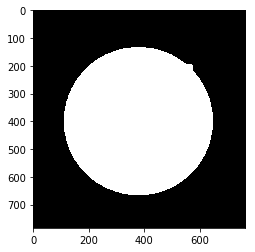

In [6]:
plt.imshow(binary_global1, cmap=plt.cm.gray)

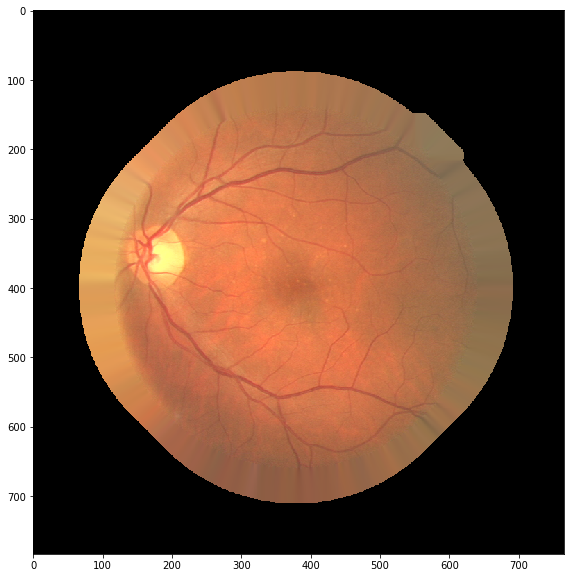

In [2]:
# add black padding around image 100 px wide
a = np.pad(a, ((100,100), (100,100), (0,0)), mode = "constant")

# convert to greyscale and perform otsu's thresholding
grayscale = rgb2gray(a)
global_thresh = threshold_otsu(grayscale)
binary_global1 = grayscale > global_thresh

# define number of pixels to expand the image
num_px_to_expand = 50

# process each channel (RGB) separately
for channel in range(a.shape[2]):

    # select a single channel
    one_channel = a[:, :, channel]

    # reset binary_global for the each channel
    binary_global = binary_global1.copy()
    
    # erode by 5 px to get rid of unusual edges from original image
    binary_global = binary_erosion(binary_global, disk(5))

    # turn everything less than the threshold to 0
    one_channel = one_channel * binary_global

    # update pixels one at a time
    for jj in range(num_px_to_expand):

        # get 1 px ring of to update
        px_to_update = np.logical_xor(binary_dilation(binary_global, disk(1)), 
                                      binary_global)

        # update those pixels with the average of their neighborhood
        x, y = np.where(px_to_update == 1)
        
        for x, y in zip(x,y):
            # make 3 x 3 px slices
            slices = np.s_[(x-1):(x+2), (y-1):(y+2)]
            
            # update a single pixel
            one_channel[x, y] = (np.sum(one_channel[slices]*
                                             binary_global[slices]) / 
                                       np.sum(binary_global[slices]))      

        
        # update original image
        a[:,:, channel] = one_channel
        
        # increase binary_global by 1 px dilation
        binary_global = binary_dilation(binary_global, disk(1))

        
        
# plot image
plt.figure(figsize=[10,10])
plt.imshow(a)

In [ ]:
channel = 1
one_channel = a[:, :, channel]
global_thresh = 0.2
binary_global = one_channel > global_thresh
plt.imshow(one_channel)

In [ ]:
plt.hist(a.reshape(-1))

In [ ]:
ii = (32, 266)
binary_global[(ii[0]-1):(ii[0] + 2), (ii[1]-1):(ii[1] + 2)]

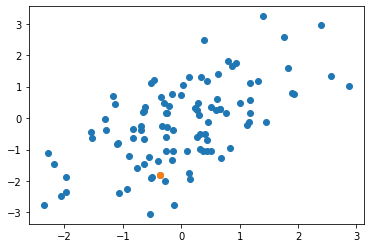

In [62]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.randn(100)
y = np.random.randn(100)  +  x

plt.plot(x, y, "o")
plt.plot(x[0], y[0], "o")

In [55]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(fit_intercept = False)

# center data on x_0, y_0
y2 = y - y[0]
x2 = x - x[0]

# fit model
lm.fit(x2.reshape(-1, 1), y2)

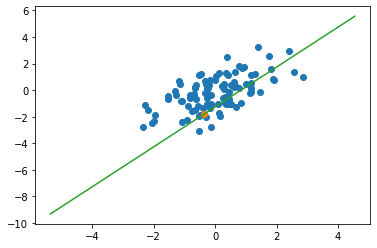

In [63]:
# predict line
preds = lm.predict(np.arange(-5, 5, 0.1).reshape(-1,1))

# plot on original scale
plt.plot(x, y, "o")
plt.plot(x[0], y[0], "o")
plt.plot(np.arange(-5, 5, 0.1) + x[0], preds  + y[0])

In [26]:
y[0]

0.9211715422038577

In [ ]:
lm.predict(np.arange(-2, 2, 0.1).reshape(-1,1)) + y[0]

In [142]:
import pandas as pd

dataset = pd.read_excel(r"C:\Users\calli\Desktop\test.xlsx", index_col = 0)
df = pd.DataFrame(dataset)
print(df.shape)
print(df.head())
cols = [0,1]
df = df.iloc[:, cols]


(5, 8)
              var  var2  pi  summaryurl  htmlabstract  abstract  project_num  \
my_row_names                                                                   
38              1     1   1           1             1         1            1   
1               2     2   2           2             2         2            2   
2               2     2   2           2             2         2            2   
3               3     3   3           3             3         3            3   
55656         888     4   4           4             4         4            4   

              dateaasdf  
my_row_names             
38                  1.0  
1                   2.0  
2                   2.0  
3                   NaN  
55656               NaN  


In [144]:
print(df)

              var  var2
my_row_names           
38              1     1
1               2     2
2               2     2
3               3     3
55656         888     4


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 38 to 55656
Data columns (total 2 columns):
var     5 non-null int64
var2    5 non-null int64
dtypes: int64(2)
memory usage: 120.0 bytes


In [88]:
df.iloc[1, :]

funding_end     2.0
keywords        2.0
pi              2.0
summaryurl      2.0
htmlabstract    2.0
abstract        2.0
project_num     2.0
dateaasdf       2.0
Name: 2, dtype: float64

In [5]:
tt = df['funding_end'] = df['funding_end'].astype(str)
tt = df.funding_end.tolist()
allenddates = []
for t in tt:
    allenddates.append(t)

bb = df['keywords'] = df['keywords'].astype(str)
bb = df.keywords.tolist()
for b in bb:
    allkeywords.append(b)

uu = df['pi'] = df['pi'].astype(str)
uu = df.pi.tolist()
for u in uu:
    allpis.append(u)

vv = df['summaryurl'] = df['summaryurl'].astype(str)
vv = df.summaryurl.tolist()
for v in vv:
    allsummaryurls.append(v)

ww = df['htmlabstract'] = df['htmlabstract'].astype(str)
ww = df.htmlabstract.tolist()
for w in ww:
    allhtmlabstracts.append(w) 

xx = df['abstract'] = df['abstract'].astype(str)
xx = df.abstract.tolist()
for x in xx:
    allabstracts.append(x) 

yy = df['project_num'] = df['project_num'].astype(str)
yy = df.project_num.tolist()
for y in yy:
    allprojectnums.append(y)    

zz = df['title'] = df['title'].astype(str)
zz = df.title.tolist()

for z in zz:
    alltitles.append(z) 

NameError: name 'allkeywords' is not defined

In [168]:
x=51
def Fibonacci(x):
    fib_array = [None]*x
    First_Value=0
    Second_Value=1
    for i in range(x):
        Next_value = First_Value
        First_Value = Second_Value
        Second_Value = Next_value + Second_Value
        fib_array[i] = First_Value
    return fib_array

In [169]:
Fibonacci(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [180]:
%%timeit
Fibonacci(1000)

70.8 µs ± 2.03 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [176]:
def Fibonacci2(x):
    fib_array = []
    First_Value=0
    Second_Value=1
    for i in range(x):
        Next_value = First_Value
        First_Value = Second_Value
        Second_Value = Next_value + Second_Value
        fib_array.append(First_Value)
    return fib_array

In [177]:
Fibonacci2(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

In [179]:
%%timeit
Fibonacci2(1000)

88.7 µs ± 2.21 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [3]:
def fibonacci_recursive(n):
    print("Calculating F", "(", n, ")", sep="", end=", ")

    # Base case
    if n == 0:
        return 0
    elif n == 1:
        return 1

    # Recursive case
    else:
        return fibonacci_recursive(n-1) + fibonacci_recursive(n-2)

In [4]:
fibonacci_recursive(5)

Calculating F(5), Calculating F(4), Calculating F(3), Calculating F(2), Calculating F(1), Calculating F(0), Calculating F(1), Calculating F(2), Calculating F(1), Calculating F(0), Calculating F(3), Calculating F(2), Calculating F(1), Calculating F(0), Calculating F(1), 

5

In [423]:
class Solution(object):
    def threeSum(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """
        nums = sorted(nums)
        return_list = []
        matching = False
        for ii in range(len(nums)):
            for jj in range(ii + 1, len(nums)):
                for kk in range(jj + 1, len(nums)):
                    if nums[ii] + nums[jj] + nums[kk] == 0:
                        return_list.append([nums[ii],  nums[jj],  nums[kk]])
                        
        for i in range(len(return_list)):
            new_k = []
            for elem in return_list:
                if elem not in new_k:
                    new_k.append(elem)
            return(new_k)


In [424]:
sol = Solution()
sol.threeSum([0,0,0])

[[0, 0, 0]]

In [426]:
%%timeit 
sol.threeSum([[82597,-9243,62390,83030,-97960,-26521,-61011,83390,-38677,12333,75987,46091,83794,19355,-71037,-6242,-28801,324,1202,-90885,-2989,-95597,-34333,35528,5680,89093,-90606,50360,-29393,-27012,53313,65213,99818,-82405,-41661,-3333,-51952,72135,-1523,26377,74685,96992,92263,15929,5467,-99555,-43348,-41689,-60383,-3990,32165,65265,-72973,-58372,12741,-48568,-46596,72419,-1859,34153,62937,81310,-61823,-96770,-54944,8845,-91184,24208,-29078,31495,65258,14198,85395,70506,-40908,56740,-12228,-40072,32429,93001,68445,-73927,25731,-91859,-24150,10093,-60271,-81683,-18126,51055,48189,-6468,25057,81194,-58628,74042,66158,-14452,-49851,-43667,11092,39189,-17025,-79173,13606,83172,92647,-59741,19343,-26644,-57607,82908,-20655,1637,80060,98994,39331,-31274,-61523,91225,-72953,13211,-75116,-98421,-41571,-69074,99587,39345,42151,-2460,98236,15690,-52507,-95803,-48935,-46492,-45606,-79254,-99851,52533,73486,39948,-7240,71815,-585,-96252,90990,-93815,93340,-71848,58733,-14859,-83082,-75794,-82082,-24871,-15206,91207,-56469,-93618,67131,-8682,75719,87429,-98757,-7535,-24890,-94160,85003,33928,75538,97456,-66424,-60074,-8527,-28697,-22308,2246,-70134,-82319,-10184,87081,-34949,-28645,-47352,-83966,-60418,-15293,-53067,-25921,55172,75064,95859,48049,34311,-86931,-38586,33686,-36714,96922,76713,-22165,-80585,-34503,-44516,39217,-28457,47227,-94036,43457,24626,-87359,26898,-70819,30528,-32397,-69486,84912,-1187,-98986,-32958,4280,-79129,-65604,9344,58964,50584,71128,-55480,24986,15086,-62360,-42977,-49482,-77256,-36895,-74818,20,3063,-49426,28152,-97329,6086,86035,-88743,35241,44249,19927,-10660,89404,24179,-26621,-6511,57745,-28750,96340,-97160,-97822,-49979,52307,79462,94273,-24808,77104,9255,-83057,77655,21361,55956,-9096,48599,-40490,-55107,2689,29608,20497,66834,-34678,23553,-81400,-66630,-96321,-34499,-12957,-20564,25610,-4322,-58462,20801,53700,71527,24669,-54534,57879,-3221,33636,3900,97832,-27688,-98715,5992,24520,-55401,-57613,-69926,57377,-77610,20123,52174,860,60429,-91994,-62403,-6218,-90610,-37263,-15052,62069,-96465,44254,89892,-3406,19121,-41842,-87783,-64125,-56120,73904,-22797,-58118,-4866,5356,75318,46119,21276,-19246,-9241,-97425,57333,-15802,93149,25689,-5532,95716,39209,-87672,-29470,-16324,-15331,27632,-39454,56530,-16000,29853,46475,78242,-46602,83192,-73440,-15816,50964,-36601,89758,38375,-40007,-36675,-94030,67576,46811,-64919,45595,76530,40398,35845,41791,67697,-30439,-82944,63115,33447,-36046,-50122,-34789,43003,-78947,-38763,-89210,32756,-20389,-31358,-90526,-81607,88741,86643,98422,47389,-75189,13091,95993,-15501,94260,-25584,-1483,-67261,-70753,25160,89614,-90620,-48542,83889,-12388,-9642,-37043,-67663,28794,-8801,13621,12241,55379,84290,21692,-95906,-85617,-17341,-63767,80183,-4942,-51478,30997,-13658,8838,17452,-82869,-39897,68449,31964,98158,-49489,62283,-62209,-92792,-59342,55146,-38533,20496,62667,62593,36095,-12470,5453,-50451,74716,-17902,3302,-16760,-71642,-34819,96459,-72860,21638,47342,-69897,-40180,44466,76496,84659,13848,-91600,-90887,-63742,-2156,-84981,-99280,94326,-33854,92029,-50811,98711,-36459,-75555,79110,-88164,-97397,-84217,97457,64387,30513,-53190,-83215,252,2344,-27177,-92945,-89010,82662,-11670,86069,53417,42702,97082,3695,-14530,-46334,17910,77999,28009,-12374,15498,-46941,97088,-35030,95040,92095,-59469,-24761,46491,67357,-66658,37446,-65130,-50416,99197,30925,27308,54122,-44719,12582,-99525,-38446,-69050,-22352,94757,-56062,33684,-40199,-46399,96842,-50881,-22380,-65021,40582,53623,-76034,77018,-97074,-84838,-22953,-74205,79715,-33920,-35794,-91369,73421,-82492,63680,-14915,-33295,37145,76852,-69442,60125,-74166,74308,-1900,-30195,-16267,-60781,-27760,5852,38917,25742,-3765,49097,-63541,98612,-92865,-30248,9612,-8798,53262,95781,-42278,-36529,7252,-27394,-5021,59178,80934,-48480,-75131,-54439,-19145,-48140,98457,-6601,-51616,-89730,78028,32083,-48904,16822,-81153,-8832,48720,-80728,-45133,-86647,-4259,-40453,2590,28613,50523,-4105,-27790,-74579,-17223,63721,33489,-47921,97628,-97691,-14782,-65644,18008,-93651,-71266,80990,-76732,-47104,35368,28632,59818,-86269,-89753,34557,-92230,-5933,-3487,-73557,-13174,-43981,-43630,-55171,30254,-83710,-99583,-13500,71787,5017,-25117,-78586,86941,-3251,-23867,-36315,75973,86272,-45575,77462,-98836,-10859,70168,-32971,-38739,-12761,93410,14014,-30706,-77356,-85965,-62316,63918,-59914,-64088,1591,-10957,38004,15129,-83602,-51791,34381,-89382,-26056,8942,5465,71458,-73805,-87445,-19921,-80784,69150,-34168,28301,-68955,18041,6059,82342,9947,39795,44047,-57313,48569,81936,-2863,-80932,32976,-86454,-84207,33033,32867,9104,-16580,-25727,80157,-70169,53741,86522,84651,68480,84018,61932,7332,-61322,-69663,76370,41206,12326,-34689,17016,82975,-23386,39417,72793,44774,-96259,3213,79952,29265,-61492,-49337,14162,65886,3342,-41622,-62659,-90402,-24751,88511,54739,-21383,-40161,-96610,-24944,-602,-76842,-21856,69964,43994,-15121,-85530,12718,13170,-13547,69222,62417,-75305,-81446,-38786,-52075,-23110,97681,-82800,-53178,11474,35857,94197,-58148,-23689,32506,92154,-64536,-73930,-77138,97446,-83459,70963,22452,68472,-3728,-25059,-49405,95129,-6167,12808,99918,30113,-12641,-26665,86362,-33505,50661,26714,33701,89012,-91540,40517,-12716,-57185,-87230,29914,-59560,13200,-72723,58272,23913,-45586,-96593,-26265,-2141,31087,81399,92511,-34049,20577,2803,26003,8940,42117,40887,-82715,38269,40969,-50022,72088,21291,-67280,-16523,90535,18669,94342,-39568,-88080,-99486,-20716,23108,-28037,63342,36863,-29420,-44016,75135,73415,16059,-4899,86893,43136,-7041,33483,-67612,25327,40830,6184,61805,4247,81119,-22854,-26104,-63466,63093,-63685,60369,51023,51644,-16350,74438,-83514,99083,10079,-58451,-79621,48471,67131,-86940,99093,11855,-22272,-67683,-44371,9541,18123,37766,-70922,80385,-57513,-76021,-47890,36154,72935,84387,-92681,-88303,-7810,59902,-90,-64704,-28396,-66403,8860,13343,33882,85680,7228,28160,-14003,54369,-58893,92606,-63492,-10101,64714,58486,29948,-44679,-22763,10151,-56695,4031,-18242,-36232,86168,-14263,9883,47124,47271,92761,-24958,-73263,-79661,-69147,-18874,29546,-92588,-85771,26451,-86650,-43306,-59094,-47492,-34821,-91763,-47670,33537,22843,67417,-759,92159,63075,94065,-26988,55276,65903,30414,-67129,-99508,-83092,-91493,-50426,14349,-83216,-76090,32742,-5306,-93310,-60750,-60620,-45484,-21108,-58341,-28048,-52803,69735,78906,81649,32565,-86804,-83202,-65688,-1760,89707,93322,-72750,84134,71900,-37720,19450,-78018,22001,-23604,26276,-21498,65892,-72117,-89834,-23867,55817,-77963,42518,93123,-83916,63260,-2243,-97108,85442,-36775,17984,-58810,99664,-19082,93075,-69329,87061,79713,16296,70996,13483,-74582,49900,-27669,-40562,1209,-20572,34660,83193,75579,7344,64925,88361,60969,3114,44611,-27445,53049,-16085,-92851,-53306,13859,-33532,86622,-75666,-18159,-98256,51875,-42251,-27977,-18080,23772,38160,41779,9147,94175,99905,-85755,62535,-88412,-52038,-68171,93255,-44684,-11242,-104,31796,62346,-54931,-55790,-70032,46221,56541,-91947,90592,93503,4071,20646,4856,-63598,15396,-50708,32138,-85164,38528,-89959,53852,57915,-42421,-88916,-75072,67030,-29066,49542,-71591,61708,-53985,-43051,28483,46991,-83216,80991,-46254,-48716,39356,-8270,-47763,-34410,874,-1186,-7049,28846,11276,21960,-13304,-11433,-4913,55754,79616,70423,-27523,64803,49277,14906,-97401,-92390,91075,70736,21971,-3303,55333,-93996,76538,54603,-75899,98801,46887,35041,48302,-52318,55439,24574,14079,-24889,83440,14961,34312,-89260,-22293,-81271,-2586,-71059,-10640,-93095,-5453,-70041,66543,74012,-11662,-52477,-37597,-70919,92971,-17452,-67306,-80418,7225,-89296,24296,86547,37154,-10696,74436,-63959,58860,33590,-88925,-97814,-83664,85484,-8385,-50879,57729,-74728,-87852,-15524,-91120,22062,28134,80917,32026,49707,-54252,-44319,-35139,13777,44660,85274,25043,58781,-89035,-76274,6364,-63625,72855,43242,-35033,12820,-27460,77372,-47578,-61162,-70758,-1343,-4159,64935,56024,-2151,43770,19758,-30186,-86040,24666,-62332,-67542,73180,-25821,-27826,-45504,-36858,-12041,20017,-24066,-56625,-52097,-47239,-90694,8959,7712,-14258,-5860,55349,61808,-4423,-93703,64681,-98641,-25222,46999,-83831,-54714,19997,-68477,66073,51801,-66491,52061,-52866,79907,-39736,-68331,68937,91464,98892,910,93501,31295,-85873,27036,-57340,50412,21,-2445,29471,71317,82093,-94823,-54458,-97410,39560,-7628,66452,39701,54029,37906,46773,58296,60370,-61090,85501,-86874,71443,-72702,-72047,14848,34102,77975,-66294,-36576,31349,52493,-70833,-80287,94435,39745,-98291,84524,-18942,10236,93448,50846,94023,-6939,47999,14740,30165,81048,84935,-19177,-13594,32289,62628,-90612,-542,-66627,64255,71199,-83841,-82943,-73885,8623,-67214,-9474,-35249,62254,-14087,-90969,21515,-83303,94377,-91619,19956,-98810,96727,-91939,29119,-85473,-82153,-69008,44850,74299,-76459,-86464,8315,-49912,-28665,59052,-69708,76024,-92738,50098,18683,-91438,18096,-19335,35659,91826,15779,-73070,67873,-12458,-71440,-46721,54856,97212,-81875,35805,36952,68498,81627,-34231,81712,27100,-9741,-82612,18766,-36392,2759,41728,69743,26825,48355,-17790,17165,56558,3295,-24375,55669,-16109,24079,73414,48990,-11931,-78214,90745,19878,35673,-15317,-89086,94675,-92513,88410,-93248,-19475,-74041,-19165,32329,-26266,-46828,-18747,45328,8990,-78219,-25874,-74801,-44956,-54577,-29756,-99822,-35731,-18348,-68915,-83518,-53451,95471,-2954,-13706,-8763,-21642,-37210,16814,-60070,-42743,27697,-36333,-42362,11576,85742,-82536,68767,-56103,-63012,71396,-78464,-68101,-15917,-11113,-3596,77626,-60191,-30585,-73584,6214,-84303,18403,23618,-15619,-89755,-59515,-59103,-74308,-63725,-29364,-52376,-96130,70894,-12609,50845,-2314,42264,-70825,64481,55752,4460,-68603,-88701,4713,-50441,-51333,-77907,97412,-66616,-49430,60489,-85262,-97621,-18980,44727,-69321,-57730,66287,-92566,-64427,-14270,11515,-92612,-87645,61557,24197,-81923,-39831,-10301,-23640,-76219,-68025,92761,-76493,68554,-77734,-95620,-11753,-51700,98234,-68544,-61838,29467,46603,-18221,-35441,74537,40327,-58293,75755,-57301,-7532,-94163,18179,-14388,-22258,-46417,-48285,18242,-77551,82620,250,-20060,-79568,-77259,82052,-98897,-75464,48773,-79040,-11293,45941,-67876,-69204,-46477,-46107,792,60546,-34573,-12879,-94562,20356,-48004,-62429,96242,40594,2099,99494,25724,-39394,-2388,-18563,-56510,-83570,-29214,3015,74454,74197,76678,-46597,60630,-76093,37578,-82045,-24077,62082,-87787,-74936,58687,12200,-98952,70155,-77370,21710,-84625,-60556,-84128,925,65474,-15741,-94619,88377,89334,44749,22002,-45750,-93081,-14600,-83447,46691,85040,-66447,-80085,56308,44310,24979,-29694,57991,4675,-71273,-44508,13615,-54710,23552,-78253,-34637,50497,68706,81543,-88408,-21405,6001,-33834,-21570,-46692,-25344,20310,71258,-97680,11721,59977,59247,-48949,98955,-50276,-80844,-27935,-76102,55858,-33492,40680,66691,-33188,8284,64893,-7528,6019,-85523,8434,-64366,-56663,26862,30008,-7611,-12179,-70076,21426,-11261,-36864,-61937,-59677,929,-21052,3848,-20888,-16065,98995,-32293,-86121,-54564,77831,68602,74977,31658,40699,29755,98424,80358,-69337,26339,13213,-46016,-18331,64713,-46883,-58451,-70024,-92393,-4088,70628,-51185,71164,-75791,-1636,-29102,-16929,-87650,-84589,-24229,-42137,-15653,94825,13042,88499,-47100,-90358,-7180,29754,-65727,-42659,-85560,-9037,-52459,20997,-47425,17318,21122,20472,-23037,65216,-63625,-7877,-91907,24100,-72516,22903,-85247,-8938,73878,54953,87480,-31466,-99524,35369,-78376,89984,-15982,94045,-7269,23319,-80456,-37653,-76756,2909,81936,54958,-12393,60560,-84664,-82413,66941,-26573,-97532,64460,18593,-85789,-38820,-92575,-43663,-89435,83272,-50585,13616,-71541,-53156,727,-27644,16538,34049,57745,34348,35009,16634,-18791,23271,-63844,95817,21781,16590,59669,15966,-6864,48050,-36143,97427,-59390,96931,78939,-1958,50777,43338,-51149,39235,-27054,-43492,67457,-83616,37179,10390,85818,2391,73635,87579,-49127,-81264,-79023,-81590,53554,-74972,-83940,-13726,-39095,29174,78072,76104,47778,25797,-29515,-6493,-92793,22481,-36197,-65560,42342,15750,97556,99634,-56048,-35688,13501,63969,-74291,50911,39225,93702,-3490,-59461,-30105,-46761,-80113,92906,-68487,50742,36152,-90240,-83631,24597,-50566,-15477,18470,77038,40223,-80364,-98676,70957,-63647,99537,13041,31679,86631,37633,-16866,13686,-71565,21652,-46053,-80578,-61382,68487,-6417,4656,20811,67013,-30868,-11219,46,74944,14627,56965,42275,-52480,52162,-84883,-52579,-90331,92792,42184,-73422,-58440,65308,-25069,5475,-57996,59557,-17561,2826,-56939,14996,-94855,-53707,99159,43645,-67719,-1331,21412,41704,31612,32622,1919,-69333,-69828,22422,-78842,57896,-17363,27979,-76897,35008,46482,-75289,65799,20057,7170,41326,-76069,90840,-81253,-50749,3649,-42315,45238,-33924,62101,96906,58884,-7617,-28689,-66578,62458,50876,-57553,6739,41014,-64040,-34916,37940,13048,-97478,-11318,-89440,-31933,-40357,-59737,-76718,-14104,-31774,28001,4103,41702,-25120,-31654,63085,-3642,84870,-83896,-76422,-61520,12900,88678,85547,33132,-88627,52820,63915,-27472,78867,-51439,33005,-23447,-3271,-39308,39726,-74260,-31874,-36893,93656,910,-98362,60450,-88048,99308,13947,83996,-90415,-35117,70858,-55332,-31721,97528,82982,-86218,6822,25227,36946,97077,-4257,-41526,56795,89870,75860,-70802,21779,14184,-16511,-89156,-31422,71470,69600,-78498,74079,-19410,40311,28501,26397,-67574,-32518,68510,38615,19355,-6088,-97159,-29255,-92523,3023,-42536,-88681,64255,41206,44119,52208,39522,-52108,91276,-70514,83436,63289,-79741,9623,99559,12642,85950,83735,-21156,-67208,98088,-7341,-27763,-30048,-44099,-14866,-45504,-91704,19369,13700,10481,-49344,-85686,33994,19672,36028,60842,66564,-24919,33950,-93616,-47430,-35391,-28279,56806,74690,39284,-96683,-7642,-75232,37657,-14531,-86870,-9274,-26173,98640,88652,64257,46457,37814,-19370,9337,-22556,-41525,39105,-28719,51611,-93252,98044,-90996,21710,-47605,-64259,-32727,53611,-31918,-3555,33316,-66472,21274,-37731,-2919,15016,48779,-88868,1897,41728,46344,-89667,37848,68092,-44011,85354,-43776,38739,-31423,-66330,65167,-22016,59405,34328,-60042,87660,-67698,-59174,-1408,-46809,-43485,-88807,-60489,13974,22319,55836,-62995,-37375,-4185,32687,-36551,-75237,58280,26942,-73756,71756,78775,-40573,14367,-71622,-77338,24112,23414,-7679,-51721,87492,85066,-21612,57045,10673,-96836,52461,-62218,-9310,65862,-22748,89906,-96987,-98698,26956,-43428,46141,47456,28095,55952,67323,-36455,-60202,-43302,-82932,42020,77036,10142,60406,70331,63836,58850,-66752,52109,21395,-10238,-98647,-41962,27778,69060,98535,-28680,-52263,-56679,66103,-42426,27203,80021,10153,58678,36398,63112,34911,20515,62082,-15659,-40785,27054,43767,-20289,65838,-6954,-60228,-72226,52236,-35464,25209,-15462,-79617,-41668,-84083,62404,-69062,18913,46545,20757,13805,24717,-18461,-47009,-25779,68834,64824,34473,39576,31570,14861,-15114,-41233,95509,68232,67846,84902,-83060,17642,-18422,73688,77671,-26930,64484,-99637,73875,6428,21034,-73471,19664,-68031,15922,-27028,48137,54955,-82793,-41144,-10218,-24921,-28299,-2288,68518,-54452,15686,-41814,66165,-72207,-61986,80020,50544,-99500,16244,78998,40989,14525,-56061,-24692,-94790,21111,37296,-90794,72100,70550,-31757,17708,-74290,61910,78039,-78629,-25033,73172,-91953,10052,64502,99585,-1741,90324,-73723,68942,28149,30218,24422,16659,10710,-62594,94249,96588,46192,34251,73500,-65995,-81168,41412,-98724,-63710,-54696,-52407,19746,45869,27821,-94866,-76705,-13417,-61995,-71560,43450,67384,-8838,-80293,-28937,23330,-89694,-40586,46918,80429,-5475,78013,25309,-34162,37236,-77577,86744,26281,-29033,-91813,35347,13033,-13631,-24459,3325,-71078,-75359,81311,19700,47678,-74680,-84113,45192,35502,37675,19553,76522,-51098,-18211,89717,4508,-82946,27749,85995,89912,-53678,-64727,-14778,32075,-63412,-40524,86440,-2707,-36821,63850,-30883,67294,-99468,-23708,34932,34386,98899,29239,-23385,5897,54882,98660,49098,70275,17718,88533,52161,63340,50061,-89457,19491,-99156,24873,-17008,64610,-55543,50495,17056,-10400,-56678,-29073,-42960,-76418,98562,-88104,-96255,10159,-90724,54011,12052,45871,-90933,-69420,67039,37202,78051,-52197,-40278,-58425,65414,-23394,-1415,6912,-53447,7352,17307,-78147,63727,98905,55412,-57658,-32884,-44878,22755,39730,3638,35111,39777,74193,38736,-11829,-61188,-92757,55946,-71232,-63032,-83947,39147,-96684,-99233,25131,-32197,24406,-55428,-61941,25874,-69453,64483,-19644,-68441,12783,87338,-48676,66451,-447,-61590,50932,-11270,29035,65698,-63544,10029,80499,-9461,86368,91365,-81810,-71914,-52056,-13782,44240,-30093,-2437,24007,67581,-17365,-69164,-8420,-69289,-29370,48010,90439,13141,69243,50668,39328,61731,78266,-81313,17921,-38196,55261,9948,-24970,75712,-72106,28696,7461,31621,61047,51476,56512,11839,-96916,-82739,28924,-99927,58449,37280,69357,11219,-32119,-62050,-48745,-83486,-52376,42668,82659,68882,38773,46269,-96005,97630,25009,-2951,-67811,99801,81587,-79793,-18547,-83086,69512,33127,-92145,-88497,47703,59527,1909,88785,-88882,69188,-46131,-5589,-15086,36255,-53238,-33009,82664,53901,35939,-42946,-25571,33298,69291,53199,74746,-40127,-39050,91033,51717,-98048,87240,36172,65453,-94425,-63694,-30027,59004,88660,3649,-20267,-52565,-67321,34037,4320,91515,-56753,60115,27134,68617,-61395,-26503,-98929,-8849,-63318,10709,-16151,61905,-95785,5262,23670,-25277,90206,-19391,45735,37208,-31992,-92450,18516,-90452,-58870,-58602,93383,14333,17994,82411,-54126,-32576,35440,-60526,-78764,-25069,-9022,-394,92186,-38057,55328,-61569,67780,77169,19546,-92664,-94948,44484,-13439,83529,27518,-48333,72998,38342,-90553,-98578,-76906,81515,-16464,78439,92529,35225,-39968,-10130,-7845,-32245,-74955,-74996,67731,-13897,-82493,33407,93619,59560,-24404,-57553,19486,-45341,34098,-24978,-33612,79058,71847,76713,-95422,6421,-96075,-59130,-28976,-16922,-62203,69970,68331,21874,40551,89650,51908,58181,66480,-68177,34323,-3046,-49656,-59758,43564,-10960,-30796,15473,-20216,46085,-85355,41515,-30669,-87498,57711,56067,63199,-83805,62042,91213,-14606,4394,-562,74913,10406,96810,-61595,32564,31640,-9732,42058,98052,-7908,-72330,1558,-80301,34878,32900,3939,-8824,88316,20937,21566,-3218,-66080,-31620,86859,54289,90476,-42889,-15016,-18838,75456,30159,-67101,42328,-92703,85850,-5475,23470,-80806,68206,17764,88235,46421,-41578,74005,-81142,80545,20868,-1560,64017,83784,68863,-97516,-13016,-72223,79630,-55692,82255,88467,28007,-34686,-69049,-41677,88535,-8217,68060,-51280,28971,49088,49235,26905,-81117,-44888,40623,74337,-24662,97476,79542,-72082,-35093,98175,-61761,-68169,59697,-62542,-72965,59883,-64026,-37656,-92392,-12113,-73495,98258,68379,-21545,64607,-70957,-92254,-97460,-63436,-8853,-19357,-51965,-76582,12687,-49712,45413,-60043,33496,31539,-57347,41837,67280,-68813,52088,-13155,-86430,-15239,-45030,96041,18749,-23992,46048,35243,-79450,85425,-58524,88781,-39454,53073,-48864,-82289,39086,82540,-11555,25014,-5431,-39585,-89526,2705,31953,-81611,36985,-56022,68684,-27101,11422,64655,-26965,-63081,-13840,-91003,-78147,-8966,41488,1988,99021,-61575,-47060,65260,-23844,-21781,-91865,-19607,44808,2890,63692,-88663,-58272,15970,-65195,-45416,-48444,-78226,-65332,-24568,42833,-1806,-71595,80002,-52250,30952,48452,-90106,31015,-22073,62339,63318,78391,28699,77900,-4026,-76870,-45943,33665,9174,-84360,-22684,-16832,-67949,-38077,-38987,-32847,51443,-53580,-13505,9344,-92337,26585,70458,-52764,-67471,-68411,-1119,-2072,-93476,67981,40887,-89304,-12235,41488,1454,5355,-34855,-72080,24514,-58305,3340,34331,8731,77451,-64983,-57876,82874,62481,-32754,-39902,22451,-79095,-23904,78409,-7418,77916]])

12.4 µs ± 120 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [57]:
return_list = [[-1, 0, 1], [-1, -1, 2], [-1, 0, 1]]

In [58]:
for ll in range(len(return_list)):
    print(return_list[ll])
    if return_list[ll] == sorted([0,1,-1]):
        continue

[-1, 0, 1]
[-1, -1, 2]
[-1, 0, 1]


In [401]:
class Solution(object):
    def twoSum(self, nums, target):
        """
        :type nums: List[int]
        :type target: int
        :rtype: List[int]
        """
        retList = []
        for ii in range(len(nums)):
            for jj in range(ii+1, len(nums)):
                if nums[ii] + nums[jj] == target:
                    retList.append([nums[ii], nums[jj], -target])
                    
                   
        for i in range(len(retList)):
            new_k = []
            for elem in retList:
                if elem not in new_k:
                    new_k.append(elem)
            return(new_k)
                
    def threeSum(self, nums):
        """
        :type nums: List[int]
        :rtype: List[List[int]]
        """

        l2 = [self.twoSum([nums[x] for x in range(len(nums)) if x != ii], -nums[ii]) for ii in range(len(nums))]
        l2 = [x for x in l2 if x]

        dupes2 = sum(l2, [])
        dupes = [sorted(x) for x in dupes2 if x]

        for i in range(len(dupes)):
            new_k = []
            for elem in dupes:
                if elem not in new_k:
                    new_k.append(elem)
            return(new_k)


In [402]:
ii = 0
nums = [0,2,0]
[nums[x] for x in range(len(nums)) if x != ii]

[2, 0]

In [403]:
sol = Solution()

In [407]:
%%timeit
sol.threeSum([-1,0,1,2,-1,-4])

3.73 µs ± 33.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [405]:
sol.twoSum([-4,-2,-2,-2,0,1,2,2,3,3,4,4,6,6], 2)

AttributeError: 'Solution' object has no attribute 'twoSum'

In [406]:
sol.threeSum([-1,0,1,2,-1,-4])

[[-1, 0, 1], [-1, -1, 2]]

In [393]:
sol.threeSum([4, 2, -2])

-1

In [84]:
aa

0

In [430]:
import pandas as pd
import numpy as np
df = pd.DataFrame({"DBN": ["00000A", "750000", "840000"], 
                  "DBN - Exam": ["00000A - Scie", "750000 - Scie", "840000 - Scie"], 
                  "Routed (Expected) Site": ["A00000", np.nan, np.nan]})

In [431]:
df

,DBN,DBN - Exam,Routed (Expected) Site
0,00000A,00000A - Scie,A00000
1,750000,750000 - Scie,NaN
2,840000,840000 - Scie,NaN


In [436]:
df.replace({'DBN - Exam':"750000 - Scie"}, {'Routed (Expected) Site': '100'}, regex=True)

,DBN,DBN - Exam,Routed (Expected) Site
0,00000A,00000A - Scie,A00000
1,750000,750000 - Scie,NaN
2,840000,840000 - Scie,NaN


In [440]:
df = pd.DataFrame({'A': ['bat', 'foo', 'bait'],
                    'B': ['abc', 'bar', 'xyz']})
df

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [442]:
df.replace({'A': r'^ba.$'}, {'B': 'new'}, regex=True)

,A,B
0,bat,abc
1,foo,bar
2,bait,xyz


In [1]:
import datetime
import pandas as pd

d1 = datetime.date(2017, 1, 1)
d2 = datetime.date(2019, 12, 31)

mydates = pd.date_range(d1, d2).tolist()
Delta = pd.Series(range(0,14)).tolist()

paymentHistory_A =[]

for i in mydates:
    for j in Delta:
        A = paymentHistory[(paymentHistory["I"]<i) & (paymentHistory["N"]>i+j) & (paymentHistory["P"]>i) ]
        A["DateCutoff"] = i
        A["Delta"]=j
        A = A.groupby(['DateCutoff','Delta'],as_index=False).agg({'Amount':'sum','DocumentNumber':'count'})
        A.columns = ['DateCutoff','Delta','A_PaymentAmount','A_DocumentNumber']
        paymentHistory_A.append(A)

paymentHistory_A = pd.concat(paymentHistory_A, sort = False)

NameError: name 'paymentHistory' is not defined

In [5]:
import numpy as np
m1 = np.array([[25, 56, 12],[ 85, 34, 75]])

In [6]:
m1.shape

(2, 3)

In [7]:
np.ones(m1.shape)

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

In [21]:
import numpy as np
import pylab as pl
from numpy import fft
    
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 20                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

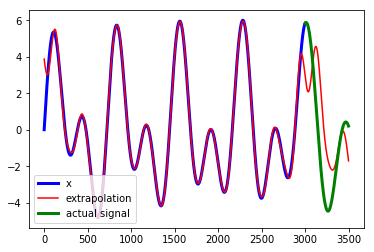

In [40]:
xx = np.linspace(0, 3.5, num = 3000)    
x = 3*np.sin(2*np.pi*xx*2.3434) + 3*np.sin(2*np.pi*xx*1.222)
n_predict = 500
extrapolation = fourierExtrapolation(x, n_predict)

pl.plot(np.arange(0, x.size), x, 'b', label = 'x', linewidth = 3)
pl.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')

xx2 = xx = np.linspace(3.5,4, num = 500)    
x2 = 3*np.sin(2*np.pi*xx2*2.3434) + 3*np.sin(2*np.pi*xx2*1.222)
pl.plot(np.arange(3000, 3500), x2, 'g', label = 'actual signal', linewidth = 3)
pl.legend(loc = 3)
pl.show()

In [41]:
list1 = [("hello","my name"),("is","hayhay")]

('hello', 'my name')
('is', 'hayhay')


In [45]:
flat_list = [item for sublist in list1 for item in sublist]
" ".join(flat_list)

'hello my name is hayhay'

In [50]:
users = ["John","Peter","Alice"]
{"u"+str(i+1): users[i] for i in range(0, len(users))}

{'u1': 'John', 'u2': 'Peter', 'u3': 'Alice'}

In [181]:
lst= ((1, 3, 5),(4, 7, 3),((2, 3), 4))
flat_list = [item for sublist in lst for item in sublist]
flat_list

[1, 3, 5, 4, 7, 3, (2, 3), 4]

In [182]:
import itertools
merged = list(itertools.chain(*lst))

In [188]:
import collections
def flatten(l):
    for el in l:
        if isinstance(el, collections.Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

In [189]:
list(flatten(lst))

[1, 3, 5, 4, 7, 3, 2, 3, 4]

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import numpy as np
import sklearn 

In [15]:
y_val = [1,2,1,2,1,2,1,2,1,2,1,2,1,2,1,2,1]
autokeras_predictions = [1,2,1,2,2,2,2,2,1,1,1,2,1,2,1,2,1]


confusion_matrix(y_val, autokeras_predictions )


array([[7, 2],
       [1, 7]], dtype=int64)

Confusion matrix, without normalization
[[7 2]
 [1 7]]


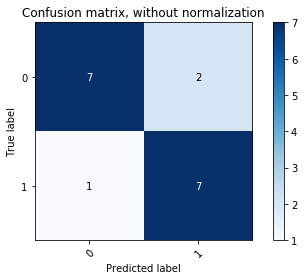

In [22]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = range(len(np.unique(y_pred)))
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_val, autokeras_predictions, classes = np.array([0,1]))

# # Plot normalized confusion matrix
# plot_confusion_matrix(y_val, autokeras_predictions, normalize=True,
#                       title='Normalized confusion matrix')

In [157]:
X = np.linspace(0, 5, num = 500)
y = 6*np.sin(2*np.pi*X*1.5) + np.random.randn(500)

In [173]:
X = np.linspace(0, 30, 1000)
y = 1*np.sin(X).ravel() + 1*np.sin(1.5*X+4.5).ravel()
y +=  0.1*np.random.randn(X.shape[0])  # add noise

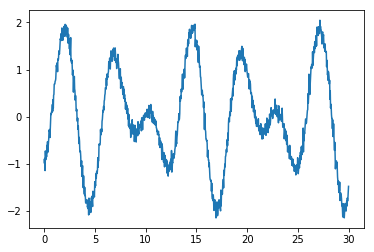

In [174]:
plt.plot(X, y)

In [175]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import WhiteKernel, ExpSineSquared

In [176]:
gp_kernel = ExpSineSquared(1.0, 5.0, periodicity_bounds=(1e-2, 3e1)) \
    + WhiteKernel(1e-1)
gpr = GaussianProcessRegressor(kernel=gp_kernel)
gpr.fit(X.reshape(-1, 1), y)


GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=ExpSineSquared(length_scale=1, periodicity=5) + WhiteKernel(noise_level=0.1),
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)

In [178]:
X_plot = np.linspace(0, 40, 1250)[:, None]
y_gpr = gpr.predict(X_plot, return_std=False)

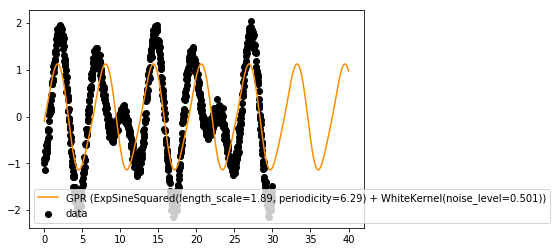

In [179]:
plt.scatter(X, y, c='k', label='data')
plt.plot(X_plot, y_gpr, color='darkorange',
         label='GPR (%s)' % gpr.kernel_)
plt.legend()

In [156]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
# Fit KernelRidge with parameter selection based on 5-fold cross validation
param_grid = {"alpha": [1e0, 1e-1, 1e-2, 1e-3],
              "kernel": [ExpSineSquared(l, p)
                         for l in np.logspace(-2, 2, 10)
                         for p in np.logspace(0, 2, 10)]}
kr = GridSearchCV(KernelRidge(), cv=5, param_grid=param_grid)
kr.fit(X.reshape(-1,1), y)

KeyboardInterrupt: 

In [ ]:
y_kr = kr.predict(X_plot)

In [ ]:
plt.scatter(X, y, c='k', label='data')
plt.plot(X_plot, 3*np.sin(2*np.pi*X_plot*1.5), color='navy',  label='True')
plt.plot(X_plot, y_kr, color='turquoise', 
         label='KRR (%s)' % kr.best_params_)
plt.legend()

In [11]:
import cv2
hog = cv2.HOGDescriptor()
im = cv2.imread(r"C:\Users\calli\Desktop\pexels-photo-1001682.jpeg")
im2 = cv2.resize(im, (64, 128))
im2.shape

(128, 64, 3)

In [12]:
h = hog.compute(im2)

In [13]:
import matplotlib.pyplot as plt

In [17]:
h.reshape(im2.shape)

ValueError: cannot reshape array of size 3780 into shape (128,64,3)

In [20]:
from skimage import feature
from skimage import io
logo = io.imread(r"C:\Users\calli\Desktop\pexels-photo-1001682.jpeg")
H = feature.hog(logo, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")

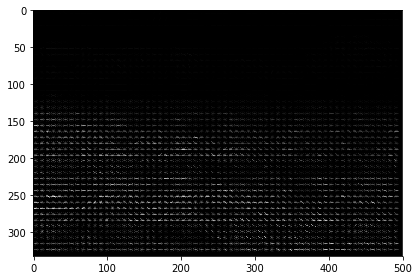

In [21]:
from skimage import exposure
from skimage import feature
import cv2
 
(H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1",
                    visualize=True)
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
 
io.imshow(hogImage)

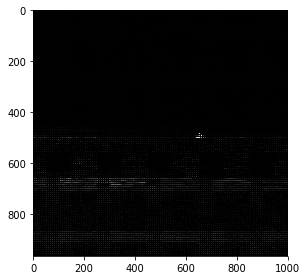

In [22]:
logo = io.imread(r"C:\Users\calli\Desktop\photo-1449942120512-7a6f1ea6b0c4.jpg")
H = feature.hog(logo, orientations=9, pixels_per_cell=(8, 8),
                cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1")
(H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), transform_sqrt=True, block_norm="L1",
                    visualize=True)
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
 
io.imshow(hogImage)

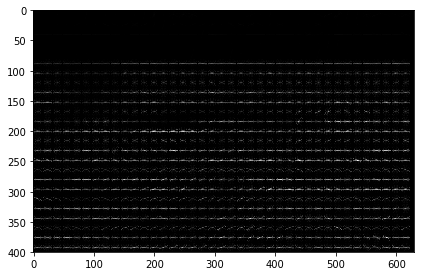

In [26]:
logo = io.imread(r"C:\Users\calli\Desktop\FinWhaleAzoresIreland_66267111_165939131.jpg")
(H, hogImage) = feature.hog(logo, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(3, 3), transform_sqrt=True, block_norm="L2",
                    visualize=True)
hogImage = exposure.rescale_intensity(hogImage, out_range=(0, 255))
hogImage = hogImage.astype("uint8")
 
io.imshow(hogImage)

In [28]:
from skimage.filters import roberts, sobel, sobel_h, sobel_v

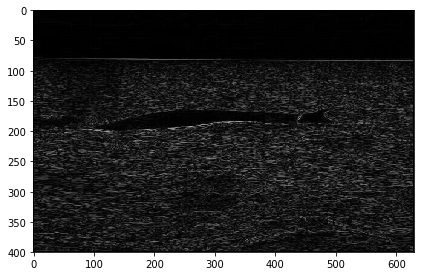

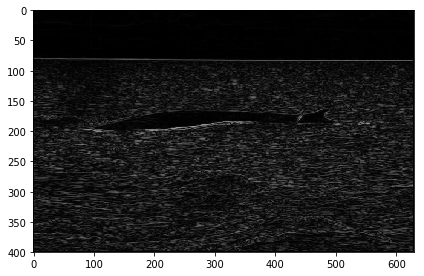

In [32]:
edge_roberts = roberts(logo[:,:,0])
edge_sobel = sobel(logo[:,:,0])
io.imshow(edge_roberts)
plt.show()
io.imshow(edge_sobel)

In [45]:
from skimage.segmentation import felzenszwalb
from skimage.data import coffee
img = logo
segments = felzenszwalb(img, scale=10.0, sigma=0.95, min_size=1000)

In [46]:
from skimage.segmentation import mark_boundaries

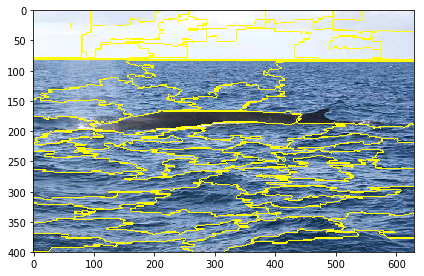

In [47]:
io.imshow(mark_boundaries(img, segments))